# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

In [55]:
# Your answer to Graded Task 1 here:

url = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'
walmart = pd.read_csv(filepath_or_buffer=url, header=0)
walmart.head(5)


,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [56]:
# Your answer to Graded Task 2 here:

# which state has the 7th highest total number of Walmart super stores?
subsetsuper = walmart[walmart.type_store == 'Supercenter']

statesuper = pd.DataFrame(subsetsuper['STRSTATE'].value_counts()).reset_index()

statesuper2 = statesuper['index'].iloc[6]
statesupercnt = statesuper['STRSTATE'].iloc[6]

print(f"{statesuper2} is the state with the 7th most Walmart super stores with {statesupercnt}.")

#which city has the 5th highest total number of Walmart stores (super stores and regular stores combined)?
walmartmod = walmart
walmartmod["city-state"] = walmart['STRCITY'].astype(str) +","+ " "+ walmart["STRSTATE"]

citystores = pd.DataFrame(walmartmod['city-state'].value_counts()).reset_index()

citystores2 = citystores['index'].iloc[4]
citystorescnt = citystores['city-state'].iloc[4]

print(f"{citystores2} is the city with the 5th most Walmart stores with {citystorescnt}.")


AL is the state with the 7th most Walmart super stores with 76.
Knoxville, TN is the city with the 5th most Walmart stores with 6.


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [57]:
# Your answer to Graded Task 3 here:

def walmarts_open (state,csv):
    walmart = pd.read_csv(filepath_or_buffer = csv, header=0)
    subsetstores = walmart[walmart.STRSTATE == state]
    subsetstores = subsetstores.copy()
    subsetstores['date'] = subsetstores['MONTH'].astype(str) +"-"+ subsetstores['DAY'].astype(str) +"-"+ subsetstores['YEAR'].astype(str)
    subsetstores['date'] = pd.to_datetime(subsetstores['date'])
    subsetstores.sort_values(by='date', ascending = True, inplace=True)
    subsetstores['cumsum'] = range(1, 1+len(subsetstores))
    subsetstores2 = subsetstores[['date', 'cumsum']]
    result = subsetstores2
    return result

csv = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'

walmarts_open('ID',csv)

,date,cumsum
1687,1992-11-02,1
1707,1992-11-02,2
1712,1992-11-02,3
1824,1993-01-05,4
1836,1993-01-05,5
1905,1993-07-27,6
1899,1993-08-31,7
2131,1996-07-23,8
2206,1997-01-29,9
2384,2000-08-16,10


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

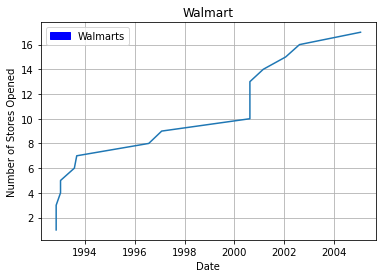

In [62]:
# Your answer to Graded Task 4 here:

walmart2 = walmarts_open('ID',csv)

if __name__ == '__main__':
    plt.plot(walmart2['date'], walmart2['cumsum'])
    plt.title("Walmart")
    plt.xlabel("Date")
    plt.ylabel("Number of Stores Opened")
    plt.grid(True)
    blue_patch = mpatches.Patch(color="blue",label="Walmarts")
    plt.legend(handles=[blue_patch])
    plt.show()

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

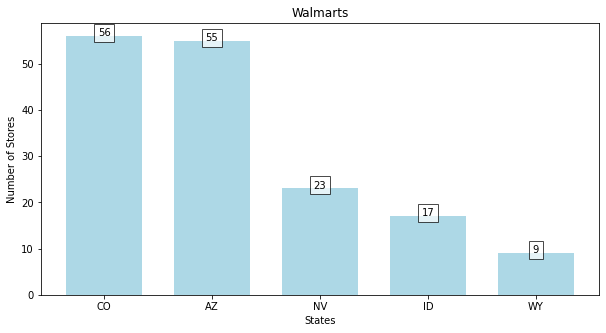

In [69]:
# Your answer to Graded Task 5 here:

utahborderdb = walmart[walmart['STRSTATE'].isin(['ID','WY','CO','AZ','NV'])]
utahbordercnt = pd.DataFrame(utahborderdb['STRSTATE'].value_counts()).reset_index()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',bbox = dict(facecolor = 'white', alpha = .7))

if __name__ == '__main__':
    x = utahbordercnt['index']
    y = utahbordercnt['STRSTATE']
    plt.figure(figsize = (10, 5))
    plt.bar(utahbordercnt['index'], utahbordercnt['STRSTATE'], color ='lightblue',width = 0.7)
    addlabels(x,y)
    plt.xlabel("States")
    plt.ylabel("Number of Stores")
    plt.title("Walmarts")
    plt.show()


# Sources
https://stackabuse.com/how-to-sort-a-pandas-dataframe-by-date/

https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

https://stackoverflow.com/questions/38862293/how-to-add-incremental-numbers-to-a-new-column-using-pandas

https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/